<a href="https://colab.research.google.com/github/Badsnowflake/quant-finance/blob/main/CA2_trading_strategy_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple moving Averages


# Importing data 



In [ ]:
!pip install tensorflow==1.15.0

In [ ]:
import numpy as np 
import pandas as pd
import datetime as dt
from pylab import mpl, plt
import matplotlib.pyplot as plt
np.random.seed(1000)
import warnings

In [ ]:
warnings.simplefilter('ignore')
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
import io 
raw = pd.read_csv(io.BytesIO(uploaded['AAPL.csv']),
                   index_col=0, 
                   parse_dates=True)
print(raw.head())
raw.info()

Saving AAPL.csv to AAPL (4).csv
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2017-09-11  40.125000  40.512501  39.972500  40.375000  38.533234  126323200
2017-09-12  40.652500  40.990002  39.692501  40.215000  38.380535  286856000
2017-09-13  39.967499  39.990002  39.477501  39.912498  38.091831  179629600
2017-09-14  39.747501  39.849998  39.522499  39.570000  37.764954   95042800
2017-09-15  39.617500  40.242500  39.500000  39.970001  38.146713  196458400
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2017-09-11 to 2021-09-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1006 non-null   float64
 1   High       1006 non-null   float64
 2   Low        1006 non-null   float64
 3   Close      1006 non-null   float64
 4   Adj Close  1006 non-null   float64
 5   Volume     1006 non-

In [ ]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2017-09-11 to 2021-09-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1006 non-null   float64
 1   High       1006 non-null   float64
 2   Low        1006 non-null   float64
 3   Close      1006 non-null   float64
 4   Adj Close  1006 non-null   float64
 5   Volume     1006 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 55.0 KB


In [ ]:
symbol = 'Adj Close'

In [ ]:
data = (
    pd.DataFrame(raw[symbol])
    .dropna()
)

# Simple moving averages 

In [ ]:
SMA1 = 42
SMA2 = 252

In [ ]:
data['SMA1'] = data[symbol].rolling(SMA1).mean()  
data['SMA2'] = data[symbol].rolling(SMA2).mean()  

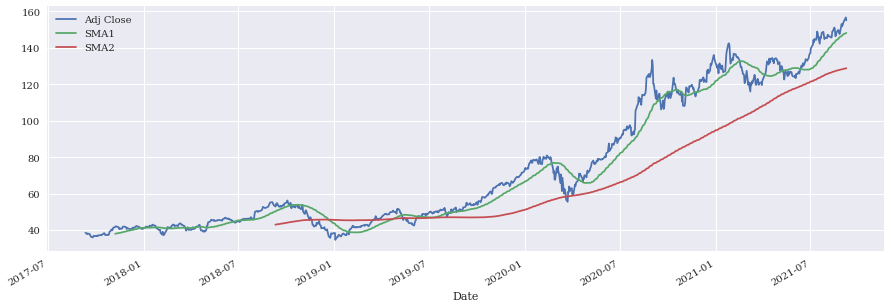

In [ ]:
data.plot(figsize=(15, 5));

In [ ]:
data.dropna(inplace=True)
data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)  

In [ ]:
data.tail()

,Adj Close,SMA1,SMA2,Position
Date,,,,
2021-09-01,152.509995,147.097548,128.277668,1
2021-09-02,153.649994,147.379511,128.369294,1
2021-09-03,154.300003,147.616327,128.504979,1
2021-09-07,156.690002,147.941667,128.649832,1
2021-09-08,155.110001,148.184931,128.820511,1


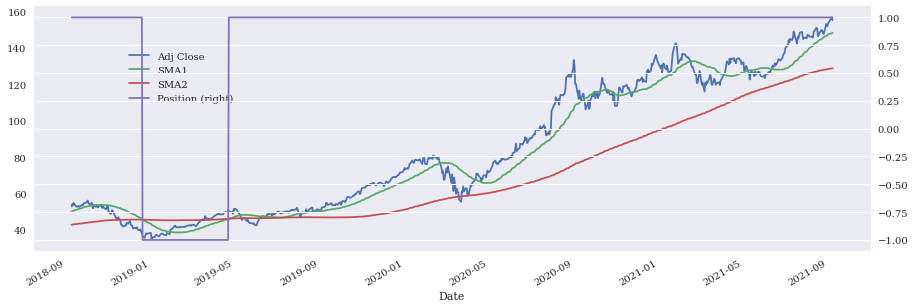

In [ ]:
ax = data.plot(secondary_y='Position', figsize=(15, 5))
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));

# Random walk Hypothesis


In [ ]:
data = pd.DataFrame(raw[symbol])

In [ ]:
lags = 5
cols = []
for lag in range(1, lags +1):
  col = 'lag_{}'.format(lag)
  data[col] = data[symbol].shift(lag)
  cols.append(col)

In [ ]:
data.head(6)

,Adj Close,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,
2017-09-11,38.533234,NaN,NaN,NaN,NaN,NaN
2017-09-12,38.380535,38.533234,NaN,NaN,NaN,NaN
2017-09-13,38.091831,38.380535,38.533234,NaN,NaN,NaN
2017-09-14,37.764954,38.091831,38.380535,38.533234,NaN,NaN
2017-09-15,38.146713,37.764954,38.091831,38.380535,38.533234,NaN
2017-09-18,37.858009,38.146713,37.764954,38.091831,38.380535,38.533234


In [ ]:
data.dropna(inplace=True)

In [ ]:
Pop = np.linalg.lstsq(data[cols], data[symbol], rcond=-1)[0]

In [ ]:
Pop.round(3)

array([ 0.884,  0.129, -0.042,  0.028,  0.003])

<BarContainer object of 5 artists>

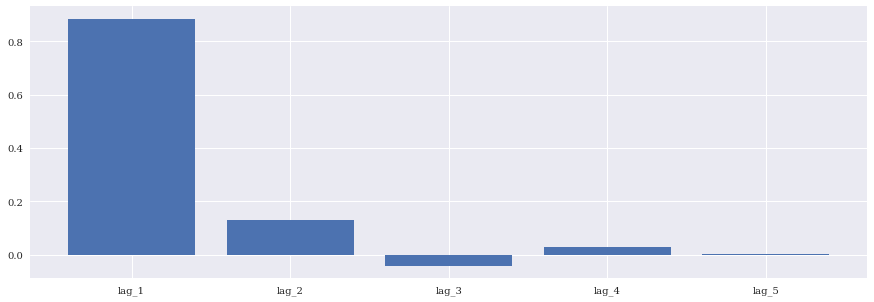

In [ ]:
plt.figure(figsize=(15, 5))
plt.bar(cols, Pop)

In [ ]:
data['Prediction'] = np.dot(data[cols], Pop)

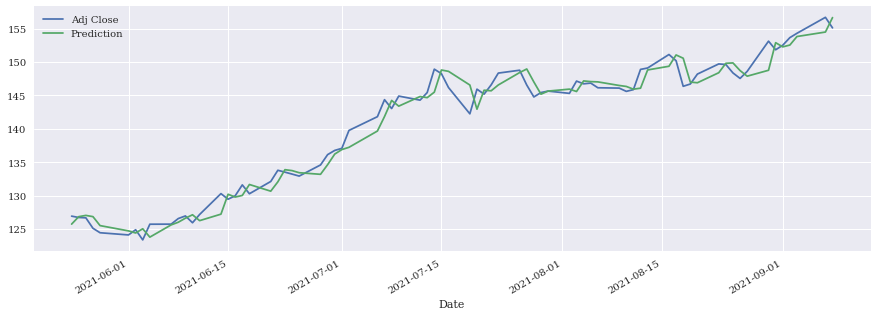

In [ ]:
data[[symbol, 'Prediction']].iloc[-75:].plot(figsize=(15, 5));

# OLS Regression 

### preparing data

In [ ]:
symbol = 'Close'

In [ ]:
data = pd.DataFrame(raw[symbol])

In [ ]:
data['returns'] = np.log(data / data.shift(1))

In [ ]:
data.dropna(inplace=True)

In [ ]:
data['direction'] = np.sign(data['returns']).astype(int)

In [ ]:
data.head()

,Close,returns,direction
Date,,,
2017-09-12,40.215000,-0.003971,-1
2017-09-13,39.912498,-0.007551,-1
2017-09-14,39.570000,-0.008618,-1
2017-09-15,39.970001,0.010058,1
2017-09-18,39.667500,-0.007597,-1


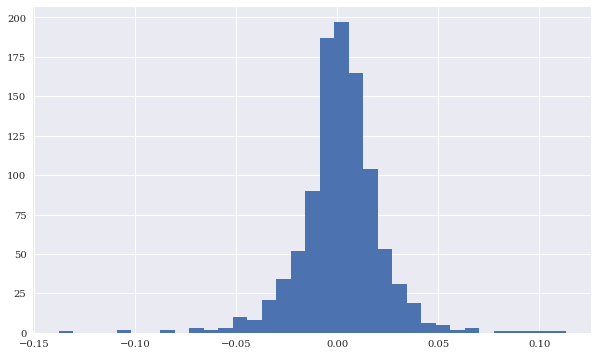

In [ ]:
data['returns'].hist(bins=35, figsize=(10, 6));

In [ ]:
lags = 2
def create_lags(data):
  global cols
  cols = []
  for lag in range(1, lags +1):
    col = 'lag_{}'.format(lag)
    data[col] = data['returns'].shift(lag)
    cols.append(col)

In [ ]:
create_lags(data)

In [ ]:
data.head()

,Close,returns,direction,lag_1,lag_2
Date,,,,,
2017-09-12,40.215000,-0.003971,-1,NaN,NaN
2017-09-13,39.912498,-0.007551,-1,-0.003971,NaN
2017-09-14,39.570000,-0.008618,-1,-0.007551,-0.003971
2017-09-15,39.970001,0.010058,1,-0.008618,-0.007551
2017-09-18,39.667500,-0.007597,-1,0.010058,-0.008618


In [ ]:
data.dropna(inplace=True)

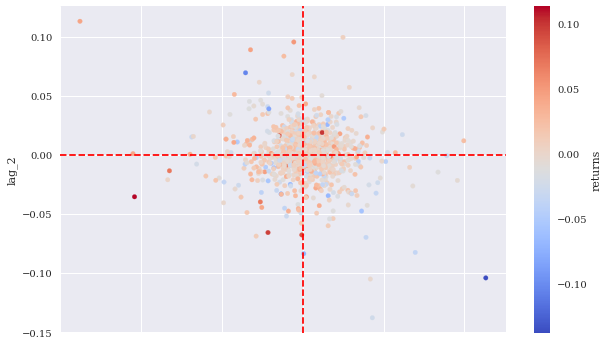

In [ ]:
data.plot.scatter(x='lag_1', y='lag_2', c='returns', 
                  cmap='coolwarm', figsize=(10, 6), colorbar=True)
plt.axvline(0, c='r', ls='--')
plt.axhline(0, c='r', ls='--');

### Regression

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
data['pos_ols_1'] = model.fit(data[cols], data['returns']).predict(data[cols])
data['pos_ols_2'] = model.fit(data[cols], data['direction']).predict(data[cols])
data[['pos_ols_1', 'pos_ols_2']].head()

,pos_ols_1,pos_ols_2
Date,,
2017-09-14,0.002498,0.106403
2017-09-15,0.002587,0.106630
2017-09-18,-0.000010,0.035887
2017-09-19,0.002732,0.121283
2017-09-20,0.001344,0.073044


In [ ]:
data[['pos_ols_1', 'pos_ols_2']] = np.where(
    data[['pos_ols_1', 'pos_ols_2']] > 0, 1, -1)

In [ ]:
data['pos_ols_1'].value_counts()

 1    741
-1    262
Name: pos_ols_1, dtype: int64

In [ ]:
data['pos_ols_2'].value_counts()

 1    890
-1    113
Name: pos_ols_2, dtype: int64

In [ ]:
(data['pos_ols_1'].diff() != 0).sum()

408

In [ ]:
(data['pos_ols_2'].diff() != 0).sum()

219

In [ ]:
data['strat_ols_1'] = data['pos_ols_1']*data['returns']
data['strat_ols_2'] = data['pos_ols_2']*data['returns']

In [ ]:
data[['returns', 'strat_ols_1', 'strat_ols_2']].sum().apply(np.exp)

returns        3.886251
strat_ols_1    4.275120
strat_ols_2    8.394306
dtype: float64

In [ ]:
(data['direction'] == data['pos_ols_1']).value_counts()

True     540
False    463
dtype: int64

In [ ]:
(data['direction'] == data['pos_ols_2']).value_counts()

True     549
False    454
dtype: int64

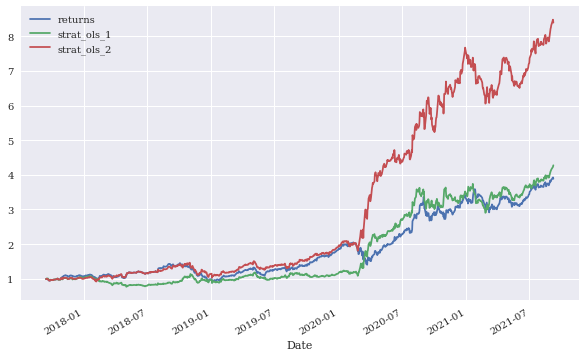

In [ ]:
data[['returns', 'strat_ols_1', 'strat_ols_2']].cumsum(
        ).apply(np.exp).plot(figsize=(10, 6));

#Clustering 

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model = KMeans(n_clusters=2, random_state=0)
model.fit(data[cols])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
data['pos_clus'] = model.predict(data[cols])
data['pos_clus'] = np.where(data['pos_clus'] == 1, -1, 1)
data['pos_clus'].values

array([-1, -1,  1, ...,  1, -1,  1])

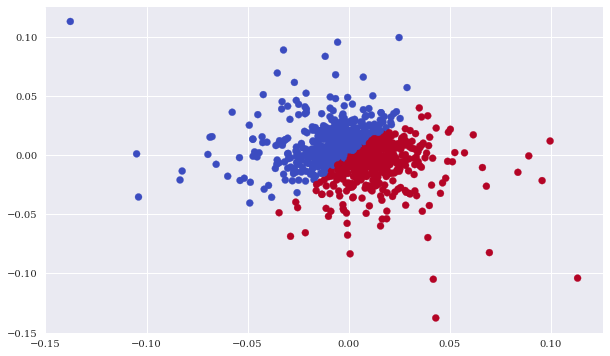

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(data[cols].iloc[:,0], data[cols].iloc[:, 1],
            c=data['pos_clus'], cmap='coolwarm');

In [ ]:
data['strat_clus'] = data['pos_clus'] * data['returns']
data[['returns', 'strat_clus']].sum().apply(np.exp)

returns       3.886251
strat_clus    1.124832
dtype: float64

In [ ]:
(data['direction'] == data['pos_clus']).value_counts()

False    523
True     480
dtype: int64

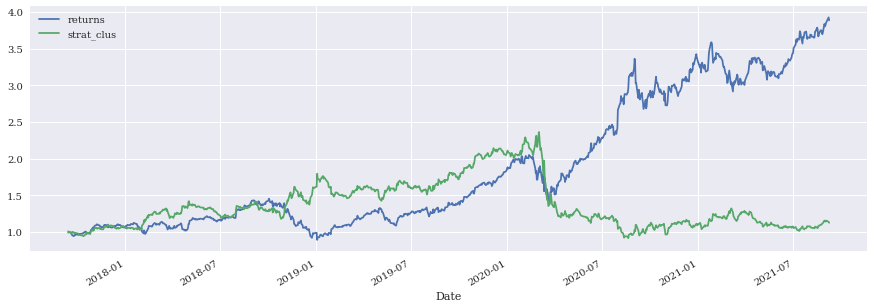

In [ ]:
data[['returns', 'strat_clus']].cumsum().apply(np.exp).plot(figsize=(15,5));

# Frequency Approch

In [ ]:
def create_bins(data, bins=[0]):
    global cols_bin
    cols_bin = []
    for col in cols:
        col_bin = col + '_bin'
        data[col_bin] = np.digitize(data[col], bins=bins)  
        cols_bin.append(col_bin)

In [ ]:
create_bins(data)

In [ ]:
data[cols_bin + ['direction']].head()

,lag_1_bin,lag_2_bin,direction
Date,,,
2017-09-14,0,0,-1
2017-09-15,0,0,1
2017-09-18,1,0,-1
2017-09-19,0,1,1
2017-09-20,1,0,-1


In [ ]:
grouped = data.groupby(cols_bin + ['direction'])
grouped.size()

lag_1_bin  lag_2_bin  direction
0          0          -1            83
                       1           119
           1          -1           118
                       0             1
                       1           140
1          0          -1           128
                       0             1
                       1           131
           1          -1           132
                       1           150
dtype: int64

In [ ]:
res = group['direction'].size().unstack(fill_value=0)

In [ ]:
def highlight_max(s):
  is_max = s == s.max()
  return ['background-color: blue' if v else '' for v in is_max]  

In [ ]:
res.style.apply(highlight_max, axis=1)

In [ ]:
data['pos_freq'] = np.where(data[cols_bin].sum(axis=1) ==2, -1, 1)
(data['direction'] == data['pos_freq']).value_counts()

True     522
False    481
dtype: int64

In [ ]:
data['strat_freq'] = data['pos_freq'] * data['returns']
data[['returns', 'strat_freq']].sum().apply(np.exp)

returns       3.886251
strat_freq    1.572569
dtype: float64

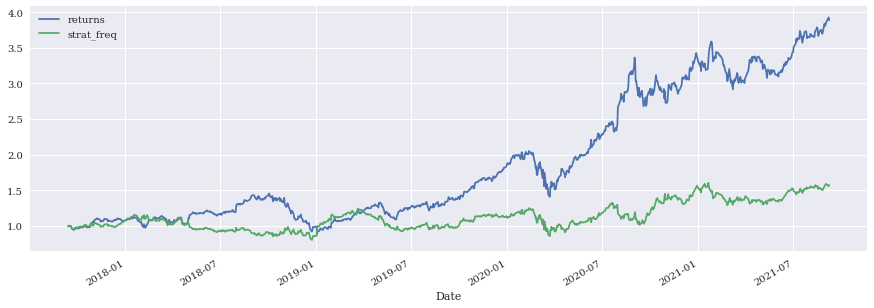

In [ ]:
data[['returns', 'strat_freq']].cumsum().apply(np.exp).plot(figsize=(15,5));

# Classification 

In [ ]:
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 

In [ ]:
C = 1

In [ ]:
models = {
    'log_reg': linear_model.LogisticRegression(C=C),
    'gauss_nb': GaussianNB(),
    'svm': SVC(C=C)
    
}

In [ ]:
def fit_models(data):  
    mfit = {model: models[model].fit(data[cols_bin], data['direction'])
            for model in models.keys()} 

In [ ]:
fit_models(data)

In [ ]:
def derive_positions(data):  
    for model in models.keys():
        data['pos_' + model] = models[model].predict(data[cols_bin])

In [ ]:
derive_positions(data)

In [ ]:
def evaluate_strats(data):  
    global sel
    sel = []
    for model in models.keys():
        col = 'strat_' + model 
        data[col] = data['pos_' + model] * data['returns']
        sel.append(col)
    sel.insert(0, 'returns')

In [ ]:
evaluate_strats(data)

In [ ]:
sel.insert(1,'strat_freq')

In [ ]:
data[sel].sum().apply(np.exp) 

returns           3.886251
strat_freq        1.572569
strat_log_reg     3.886251
strat_gauss_nb    3.886251
strat_svm         3.886251
dtype: float64

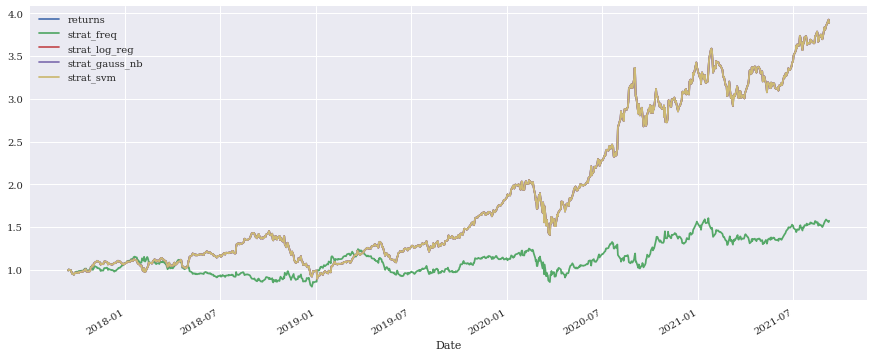

In [ ]:
data[sel].cumsum().apply(np.exp).plot(figsize=(15, 6));

In [ ]:
data = pd.DataFrame(raw[symbol])
data['returns'] = np.log(data / data.shift(1))
data['direction'] = np.sign(data['returns'])

In [ ]:
lag = 5
create_lags(data)
data.dropna(inplace=True)

In [ ]:
create_bins(data)
cols_bin

['lag_1_bin', 'lag_2_bin']

In [ ]:
data[cols_bin].head()

,lag_1_bin,lag_2_bin
Date,,
2017-09-14,0,0
2017-09-15,0,0
2017-09-18,1,0
2017-09-19,0,1
2017-09-20,1,0


In [ ]:
data.dropna(inplace=True)
fit_models(data)
derive_positions(data)
evaluate_strats(data)
data[sel].sum().apply(np.exp)

returns           3.886251
strat_log_reg     3.886251
strat_gauss_nb    3.886251
strat_svm         3.886251
dtype: float64

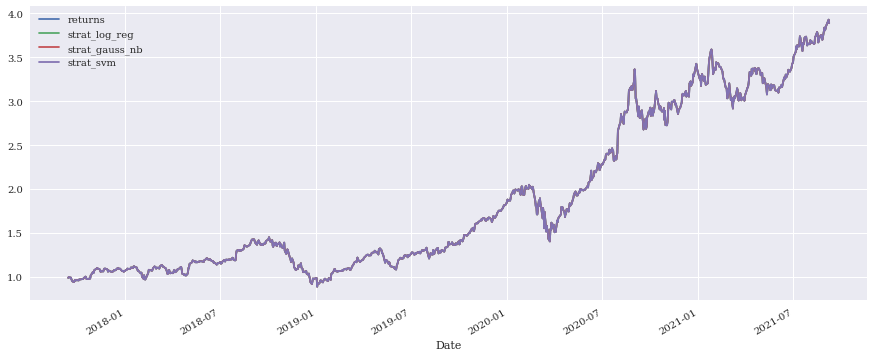

In [ ]:
data[sel].cumsum().apply(np.exp).plot(figsize=(15, 6));

In [ ]:
Q = data['returns'].mean()
I = data['returns'].std()

In [ ]:
bins = [Q - I, Q,   Q + I]
bins

[-0.019225641634451483, 0.0013533848864929322, 0.02193241140743735]

In [ ]:
create_bins(data, bins)
data[cols_bin].head()

,lag_1_bin,lag_2_bin
Date,,
2017-09-14,1,1
2017-09-15,1,1
2017-09-18,2,1
2017-09-19,1,2
2017-09-20,1,1


In [ ]:
fit_models(data)
derive_positions(data)
evaluate_strats(data)
data[sel].sum().apply(np.exp)

returns           3.886251
strat_log_reg     8.272414
strat_gauss_nb    5.448675
strat_svm         9.026450
dtype: float64

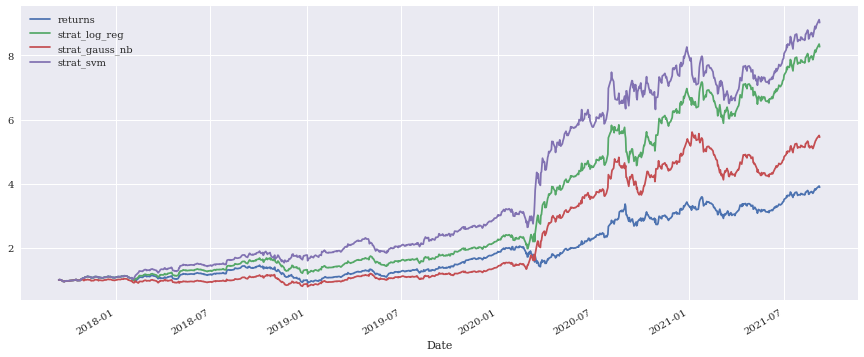

In [ ]:
data[sel].cumsum().apply(np.exp).plot(figsize=(15, 6));

### Seqnuatial Train test Split

In [ ]:
split = int(len(data)* 0.5)
train = data.iloc[:split].copy()
fit_models(train)
test = data.iloc[split:].copy()
derive_positions(test)
test[sel].sum().apply(np.exp)
test[sel].sum().apply(np.exp)

returns           2.774901
strat_log_reg     2.774901
strat_gauss_nb    2.774901
strat_svm         2.774901
dtype: float64

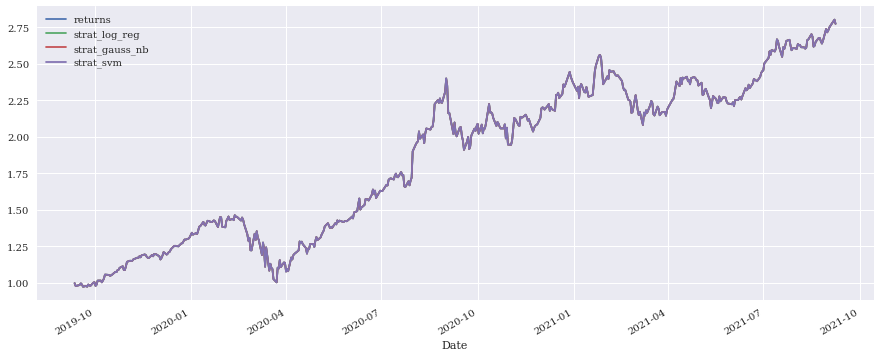

In [ ]:
test[sel].cumsum().apply(np.exp).plot(figsize=(15,6));

### Randomized Train test Split

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.5,
                               shuffle=True, random_state=100)

In [ ]:
train = train.copy().sort_index()
train[cols_bin].head()

,lag_1_bin,lag_2_bin
Date,,
2017-09-14,0,0
2017-09-15,0,0
2017-09-18,1,0
2017-09-20,1,0
2017-09-21,0,1


In [ ]:
test = test.copy().sort_index()
fit_models(train)
derive_positions(test)
evaluate_strats(test)
test[sel].sum().apply(np.exp)

returns           2.525982
strat_log_reg     1.497263
strat_gauss_nb    1.152129
strat_svm         1.495671
dtype: float64

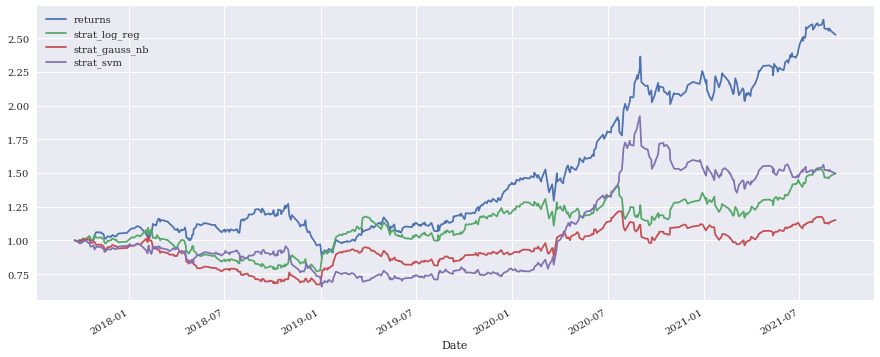

In [ ]:
test[sel].cumsum().apply(np.exp).plot(figsize=(15,6));

# Deep Neural Network 

### Deep neural network with Scikitlearn 

In [ ]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(solver='lbfgs', alpha=1e-5,
                      hidden_layer_sizes=2 * [250], random_state=1)

In [ ]:
%time model.fit(data[cols_bin], data['direction'])

CPU times: user 12.2 s, sys: 14.5 s, total: 26.7 s
Wall time: 13.7 s


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[250, 250], learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
data['pos_dnn_sk'] = model.predict(data[cols_bin])
data['strat_dnn_sk'] = data['pos_dnn_sk'] * data['returns']
data[['returns', 'strat_dnn_sk']].sum().apply(np.exp)

returns         3.886251
strat_dnn_sk    9.026450
dtype: float64

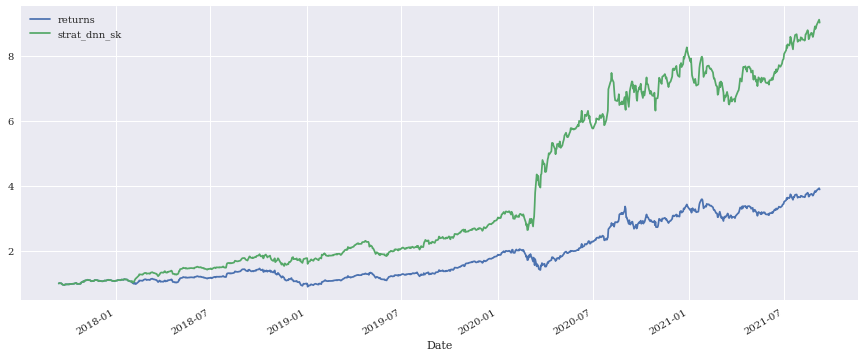

In [ ]:
data[['returns', 'strat_dnn_sk']].cumsum().apply(np.exp).plot(figsize=(15, 6));

In [ ]:
train, test = train_test_split(data, test_size=0.5, random_state=100)
train = train.copy().sort_index()
test = test.copy().sort_index()
model = MLPClassifier(solver='lbfgs', alpha=1e-5, max_iter=500,
                      hidden_layer_sizes=3 * [500], random_state=1)

In [ ]:
%time model.fit(train[cols_bin], train['direction'])

CPU times: user 1min 38s, sys: 1min 25s, total: 3min 3s
Wall time: 1min 34s


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[500, 500, 500], learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
test['pos_dnn_sk'] = model.predict(test[cols_bin])
test['strat_dnn_sk'] = test['pos_dnn_sk'] * test['returns']
test[['returns', 'strat_dnn_sk']].sum().apply(np.exp)

returns         2.525982
strat_dnn_sk    2.984233
dtype: float64

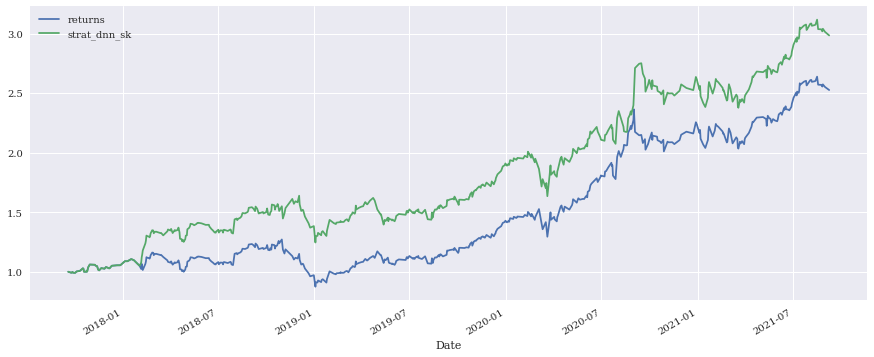

In [ ]:
test[['returns', 'strat_dnn_sk']].cumsum().apply(np.exp).plot(figsize=(15, 6));

### Deep Neural Network with tenserflow

In [ ]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

In [ ]:
fc = [tf.contrib.layers.real_valued_column('lags', dimension=lags)]

In [ ]:
model = tf.contrib.learn.DNNClassifier(hidden_units=3 * [500],
                                       n_classes=len(bins) + 1,
                                       feature_columns=fc)

In [ ]:
def input_fn():
    fc = {'lags': tf.constant(data[cols_bin].values)}
    la = tf.constant(data['direction'].apply(lambda x: 0 if x < 0 else 1).values,
                     shape=[data['direction'].size, 1])
    return fc, la

In [ ]:
%time model.fit(input_fn=input_fn, steps=500)  

CPU times: user 33.5 s, sys: 1.11 s, total: 34.6 s
Wall time: 19.3 s


DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x7faf995b2410>, 'hidden_units': [500, 500, 500], 'feature_columns': (_RealValuedColumn(column_name='lags', dimension=2, default_value=None, dtype=tf.float32, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x7fafa479ad40>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

In [ ]:
model.evaluate(input_fn=input_fn, steps=1)

{'accuracy': 0.55888224, 'global_step': 500, 'loss': 0.68494153}

In [ ]:
pred = np.array(list(model.predict(input_fn=input_fn)))
pred[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
data['pos_dnn_tf'] = np.where(pred > 0, 1, -1)
data['strat_dnn_tf'] = data['pos_dnn_tf'] * data['returns']
data[['returns', 'strat_dnn_tf']].sum().apply(np.exp)

returns         1.538511
strat_dnn_tf    2.959523
dtype: float64

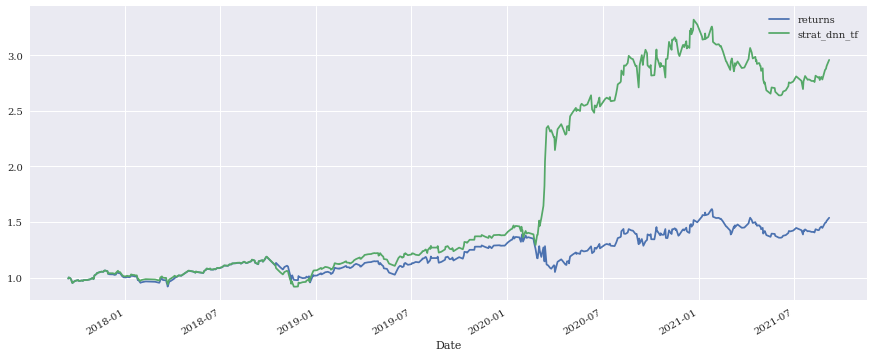

In [ ]:
data[['returns', 'strat_dnn_tf']].cumsum().apply(np.exp).plot(figsize=(15, 6));

In [ ]:
model = tf.contrib.learn.DNNClassifier(hidden_units=3 * [500],
                                       n_classes=len(bins) + 1,
                                       feature_columns=fc)

In [ ]:
data = train
%time model.fit(input_fn=input_fn, steps=2500)

CPU times: user 2min 40s, sys: 15.4 s, total: 2min 56s
Wall time: 1min 38s


DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x7faf96f48550>, 'hidden_units': [500, 500, 500], 'feature_columns': (_RealValuedColumn(column_name='lags', dimension=2, default_value=None, dtype=tf.float32, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x7fafa479ad40>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

In [ ]:
data = test
model.evaluate(input_fn=input_fn, steps=1)

{'accuracy': 0.5438247, 'global_step': 2500, 'loss': 0.69619924}

In [ ]:
pred = np.array(list(model.predict(input_fn=input_fn)))

In [ ]:
test['pos_dnn_tf'] = np.where(pred > 0, 1, -1)
test['strat_dnn_tf'] = test['pos_dnn_tf'] * test['returns']
test[['returns', 'strat_dnn_sk', 'strat_dnn_tf']].sum().apply(np.exp)

returns         2.525982
strat_dnn_sk    2.984233
strat_dnn_tf    2.791784
dtype: float64

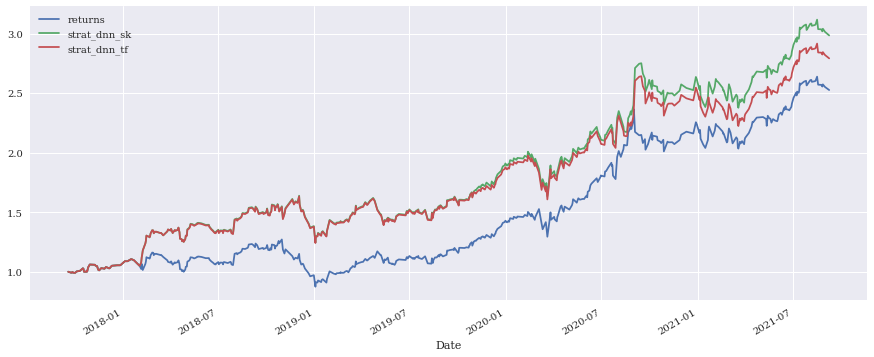

In [ ]:
test[['returns', 'strat_dnn_sk', 'strat_dnn_tf']].cumsum().apply(np.exp).plot(figsize=(15, 6));